<h1 style="color: #092b61;"><center>Analysing User Behaviour on Instagram Using Python</center></h1><br>
Kevin Folkes <br>
2023-05-05

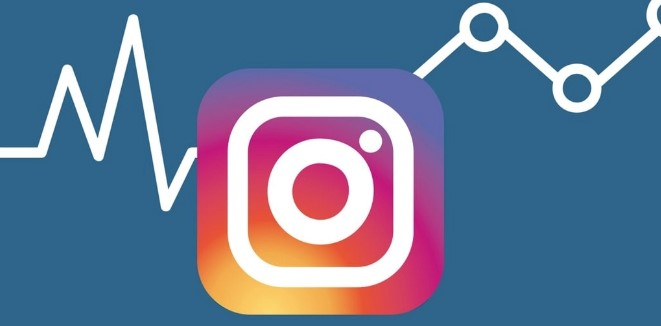

## Project Layout:
<br>
<br>
This project is a take on Hi Counselor's <a href="https://www.linkedin.com/events/realworldliveprojectfordataanal7049302959066603520/comments/"> Analysing User Behaviour on Instagram Using Python</a> Using Jupyter Notebook and MSSQL (Microsoft SQL Sever) instead of their platform and MySQL. Additionally, all queries and SQL scripts are done directly in the notebook using python.
<br>

### Parts:
<br>
The project is split into 2 parts.

 - Part 1: Simple Data cleaning with Python.<br>
 - Part 2: Connecting, Reading & Writing to a Database using Python & Creating Visualizations Using Python.<br>
 
 
### Tasks
<br>
Each part of the project will have a subset of tasks. While parts 1 & 2 tasks are taken directly from Hi Counselor's <a href="https://hicounselor.com/projects/analysing-user-behaviour-on-instagram-using-python-and-sql"> project </a>, Part 2 also contains python visualizations with Seaborn from the applicable queries.


### Constraints
 - The datasets used are third-party however, the source is unknown.
 - The data is not current as the years are from 2016 - 2017.
 - 2 Questions/Task from the original project was dropped:
 
    1. Total Posts by users (longer version of SELECT COUNT(*)FROM photos) - *This was deemed redundant as it is answered in Part 2, task 5.* <br><br>
    2.  Find the percentage of our users who have either never commented on a photo or have commented on photos before. - *This was dropped as the task is not clear. Users who have never commented on a photo or users who have commented on photos are all users, which is answered in the result of part 2, task 5.*

---

## Part 1 - Simple Data Cleaning with Python

In [1]:
# Importing Labraries for the entire project.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc
import warnings

# Truning off warnings
warnings.filterwarnings('ignore')
# Setting option to diplay all rows when a df is colled
pd.set_option('display.max_rows', None)
# Setting the theme for the seaborn plots
sns.set_theme(style='dark')


In [2]:
# Importing all necessary csv's as dataframes and storing them in a dictionary.


# placing the names of the files to import into a list.
files = ['comments.csv', 'follows.csv', 'likes.csv', 
         'photo_tags.csv', 'photos.csv','tags.csv','users.csv']

# placing the names to use for each dataframe into a list.
dataframes = ['comments', 'follows', 'likes',
             'photo_tags','photos', 'tags', 'users']

# create an empty dictionary to store the dataframes and their names
dfs = {}

# Looping through the file and names and importing each file into a dataframe
for file, name in zip(files, dataframes):
    df = pd.read_csv(file)
    dfs[name] = df

<h4>Task 1:</h4>

Rename columns, only these columns are allowed in the dataset<br>
<br>

    1.	id 
    2.	comment_text
    3.	user_id
    4.	photo_id
    5.	created_at

In [3]:
# Get a list of the columns in the dataframe
dfs['comments'].columns

Index(['id', 'comment', 'User  id', 'Photo id', 'created Timestamp',
       'posted date', 'emoji used', 'Hashtags used count'],
      dtype='object')

In [4]:
# Remove unwanted columns and store the dataframe outside of the dictionary
comments = dfs['comments'][['id', 'comment', 'User  id', 'Photo id', 'created Timestamp']]

# Rename the columns to the desired names in outlined in task 1
comments.rename(columns={
    'comment': 'comment_text',
    'User  id': 'user_id',
    'Photo id': 'photo_id',
    'created Timestamp': 'created_at'
}, inplace=True)

<h4>Task 2:</h4>

Rename columns, only these columns are allowed in the dataset<br>
<br>

    1.	follower_id
    2.	followee_id
    3.	created_at

In [5]:
# Get a list of the columns in the dataframe
dfs['follows'].columns

Index(['follower', 'followee ', 'created time', 'is follower active',
       'followee Acc status'],
      dtype='object')

In [6]:
# Remove unwanted columns and store the dataframe outside of the dictionary.
follows = dfs['follows'][['follower', 'followee ', 'created time']]

# Rename the columns to the desired names in outlined in task 2
follows.rename(columns={
    'follower': 'follower_id',
    'followee ': 'followee_id',
    'created time': 'created_at'
}, inplace=True)

<h4>Task 3:</h4>
    
Rename columns, only these columns are allowed in the dataset<br>
<br>

    1.	user_id
    2.	photo_id
    3.	created_at

In [7]:
# Get a list of the columns in the dataframe
dfs['likes'].columns

Index(['user ', 'photo', 'created time', 'following or not', 'like type'], dtype='object')

In [8]:
# Remove unwanted columns and store the dataframe outside of the dictionary.
likes = dfs['likes'][['user ', 'photo', 'created time']]

# Rename the columns to the desired names in outlined in task 3
likes.rename(columns={
    'user ': 'user_id',
    'photo': 'photo_id',
    'created time': 'created_at'
}, inplace=True)

<h4>Task 4:</h4>
    
Rename columns, only these columns are allowed in the dataset<br>

    1.	photo_id
    2.	tag_id

In [9]:
# Get a list of the columns in the dataframe
dfs['photo_tags'].columns

Index(['photo', 'tag ID', 'user id'], dtype='object')

In [10]:
# Remove unwanted columns and store the dataframe outside of the dictionary
photo_tags = dfs['photo_tags'][['photo', 'tag ID']]

# Rename the columns to the desired names in outlined in task 4.
photo_tags.rename(columns={
    'photo': 'photo_id',
    'tag ID': 'tag_id'
}, inplace=True)

<h4>Task 5:</h4>

Rename columns, only these columns are allowed in the dataset<br>

    1.	id
    2.	image_url
    3.	user_id
    4.	created_date

In [11]:
# Get a list of the columns in the dataframe
dfs['photos'].columns

Index(['id', 'image link', 'user ID', 'created dat', 'Insta filter used',
       'photo type'],
      dtype='object')

In [12]:
# Remove unwanted columns and store the dataframe outside of the dictionary
photos = dfs['photos'][['id', 'image link', 'user ID', 'created dat']]

# Rename the columns to the desired names in outlined in task 5.
photos.rename(columns={
    'image link': 'image_url',
    'user ID': 'user_id',
    'created dat': 'created_date'
}, inplace=True)

<h4>Task 6:</h4>

rename columns, only these columns are allowed in the dataset<br>

    1.	id
    2.	tag_name
    3.	created_at

In [13]:
# Get a list of the columns in the dataframe
dfs['tags'].columns

Index(['id', 'tag text', 'created time', 'location'], dtype='object')

In [14]:
# Remove unwanted columns and store the dataframe outside of the dictionary
tags = dfs['tags'][['id', 'tag text', 'created time']]

# Rename the columns to the desired names in outlined in task 6
tags.rename(columns={
    'tag text': 'tag_name',
    'created time': 'created_at'
}, inplace=True)

<h4>Task 7:</h4>

rename columns, only these columns are allowed in the dataset<br>

    1.	id
    2.	username
    3.	created_at

In [15]:
dfs['users'].columns

Index(['id', 'name', 'created time', 'private/public', 'post count',
       'Verified status'],
      dtype='object')

In [16]:
# Remove unwanted columns and store the dataframe outside of the dictionary
users = dfs['users'][['id', 'name', 'created time']]

# Rename the columns to the desired names in outlined in task 7
users.rename(columns={
    'name': 'username',
    'created time': 'created_at'
}, inplace=True)

In [17]:
# Changing the date format to a python date time so SQL can read the data when uploading into the database

comments['created_at'] = pd.to_datetime(comments['created_at'], format='%d-%m-%Y %H:%M')
follows['created_at'] = pd.to_datetime(follows['created_at'], format='%d-%m-%Y %H:%M')
likes['created_at'] = pd.to_datetime(likes['created_at'], format='%d-%m-%Y %H:%M')
photos['created_date'] = pd.to_datetime(photos['created_date'], format='%d-%m-%Y %H:%M')
tags['created_at'] = pd.to_datetime(tags['created_at'], format='%d-%m-%Y %H:%M')
users['created_at'] = pd.to_datetime(users['created_at'], format='%d-%m-%Y %H:%M')


---

## Part 2: Connecting, Reading & Writing to a Database using Python

In this section, data manipulation will be done using SQL with python, while we can do the same by just using the pandas dataframes already created, the intent here is to utilize SQL queries.

In [18]:
# Setting up SQL Connection with MSSQL
# Windows authentications is used with MSSQL therefore no username and password is necessary.

conxn = pyodbc.connect(
                       "Driver={SQL Server Native Client 11.0};"
                      "Server=FRIDAY\SQLEXPRESS;"
                      "Database=Hi_Counrselor;"
                      "trusted_connection=yes;" 
                        )

# Setting cursor to be able to read and write queries
cursor = conxn.cursor()

In [19]:
# Creating a list of CREATE TABLE SQL queries that will create a table for each dataframe.
# These tables will be stored in the database outlined in the conxn variable (Hi_Counselor)

create_table_query = ["""

    DROP TABLE IF EXISTS [Hi_Counselor].[dbo].[comments]

    CREATE TABLE[Hi_Counselor].[dbo].[comments]
    (
        [id] INT NOT NULL,
        [comment_text] NVARCHAR(MAX) NULL,
        [user_id] INT NOT NULL,
        [photo_id] INT NULL,
        [created_at] DATETIME NOT NULL
    )
""",
"""

    DROP TABLE IF EXISTS [Hi_Counselor].[dbo].[follows]

    CREATE TABLE[Hi_Counselor].[dbo].[follows]
    (
        [follower_id] INT NOT NULL,
        [followee_id] INT NULL,
        [created_at] DATETIME NOT NULL
    )
""",
"""

    DROP TABLE IF EXISTS [Hi_Counselor].[dbo].[likes]

    CREATE TABLE[Hi_Counselor].[dbo].[likes]
    (
        [user_id] INT NOT NULL,
        [photo_id] INT NULL,
        [created_at] DATETIME NOT NULL
    )
""",
"""

    DROP TABLE IF EXISTS [Hi_Counselor].[dbo].[photo_tags]

    CREATE TABLE[Hi_Counselor].[dbo].[photo_tags]
    (
        [photo_id] INT NOT NULL,
        [tag_id] INT NULL
    )
""",
"""

    DROP TABLE IF EXISTS [Hi_Counselor].[dbo].[photos]

    CREATE TABLE[Hi_Counselor].[dbo].[photos]
    (
        [id] INT NOT NULL,
        [image_url] NVARCHAR(MAX) NOT NULL,
        [user_id] INT NOT NULL,
        [created_date] DATETIME NOT NULL
    )
""",  
"""

    DROP TABLE IF EXISTS [Hi_Counselor].[dbo].[tags]

    CREATE TABLE[Hi_Counselor].[dbo].[tags]
    (
        [id] INT NOT NULL,
        [tag_name] NVARCHAR(MAX) NOT NULL,
        [created_at] DATETIME NOT NULL
    )
""", 
"""

    DROP TABLE IF EXISTS [Hi_Counselor].[dbo].[users]

    CREATE TABLE[Hi_Counselor].[dbo].[users]
    (
        [id] INT NOT NULL,
        [username] NVARCHAR(MAX) NOT NULL,
        [created_at] DATETIME NOT NULL
    )
"""
]

In [20]:
# Creatinng all 7 tables in the database using a for loop

for table in create_table_query:
    cursor.execute(table)
    cursor.commit()

In [21]:
# Tables are empty and still needs data inserted into them. 
# Creating a list of INSERT INTO queries to have all the dataframes data inserted into their tabels.

sql_insert_query = [
    """
    INSERT INTO [Hi_Counselor].[dbo].[comments]
    (
        [id],
        [comment_text],
        [user_id],
        [photo_id],
        [created_at]
    )
    VALUES
    (
        ?,?,?,?,?
    )
    """,
    """
    INSERT INTO [Hi_Counselor].[dbo].[follows]
    (
        [follower_id],
        [followee_id],
        [created_at]
    )
    VALUES
    (
        ?,?,?
    )
    """,
    """
    INSERT INTO [Hi_Counselor].[dbo].[likes]
    (
        [user_id],
        [photo_id],
        [created_at]
    )
    VALUES
    (
        ?,?,?
    )
    """,
    """
    INSERT INTO [Hi_Counselor].[dbo].[photo_tags]
    (
        [photo_id],
        [tag_id]
    )
    VALUES
    (
        ?,?
    )
    """,
    """
    INSERT INTO [Hi_Counselor].[dbo].[photos]
    (
        [id],
        [image_url],
        [user_id],
        [created_date]
    )
    VALUES
    (
        ?,?,?,?
    )
    """,
    """
    INSERT INTO [Hi_Counselor].[dbo].[tags]
    (
        [id],
        [tag_name],
        [created_at]
    )
    VALUES
    (
        ?,?,?
    )
    """,
        """
    INSERT INTO [Hi_Counselor].[dbo].[users]
    (
        [id],
        [username],
        [created_at]
    )
    VALUES
    (
        ?,?,?
    )
    """
]

In [22]:
# Creating a list of dataframes to use in a for loop that inserts the data into the tables.

dfs = [comments, follows, likes, photo_tags, photos, tags, users]

# looping through the list of dataframes and converting it to records (a list of lists)
for i, df in enumerate(dfs):
    query = sql_insert_query[i]
    records = df.values.tolist()

    # inserting each row of the df into their respective  tables.
    cursor.executemany(query, records)
    cursor.commit()

In [23]:
# to correct the date column in each table, an update query will be used convert it to the corrected format.
# create a list of update queries for each table.

update_query = [
"""

UPDATE [Hi_Counselor].[dbo].[comments]
SET [created_at] = CONVERT(nvarchar(16), [created_at], 101) + ' ' + CONVERT(nvarchar(16), [created_at], 108)

""",
"""

UPDATE [Hi_Counselor].[dbo].[follows]
SET [created_at] = CONVERT(nvarchar(16), [created_at], 101) + ' ' + CONVERT(nvarchar(16), [created_at], 108)

""",
"""

UPDATE [Hi_Counselor].[dbo].[likes]
SET [created_at] = CONVERT(nvarchar(16), [created_at], 101) + ' ' + CONVERT(nvarchar(16), [created_at], 108)

""",
"""

UPDATE [Hi_Counselor].[dbo].[photos]
SET [created_date] = CONVERT(nvarchar(16), [created_date], 101) + ' ' + CONVERT(nvarchar(16), [created_date], 108)

""",
"""

UPDATE [Hi_Counselor].[dbo].[tags]
SET [created_at] = CONVERT(nvarchar(16), [created_at], 101) + ' ' + CONVERT(nvarchar(16), [created_at], 108)

""",
"""

UPDATE [Hi_Counselor].[dbo].[users]
SET [created_at] = CONVERT(nvarchar(16), [created_at], 101) + ' ' + CONVERT(nvarchar(16), [created_at], 108)

"""
               ]

In [24]:
# Loop through the list and run each query

for query in update_query:
    cursor.execute(query)
    cursor.commit()

In [25]:
# defining a function to read each query into a dataftame.

def send_query(query):
    """Takes a query string from a variable and returns the results in a dataframe"""
    conxn = pyodbc.connect(
                       "Driver={SQL Server Native Client 11.0};"
                      "Server=FRIDAY\SQLEXPRESS;"
                      "Database=Hi_Counrselor;"
                      "trusted_connection=yes;" 
                        )
    result = pd.read_sql(query, conxn)
    return result

<h4>Task 1:</h4>

Find the 5 oldest users.

In [26]:
task1 = """
SELECT TOP 5 id,
        username,
        created_at
FROM Hi_Counselor.dbo.users
ORDER BY 3 ASC
"""

In [27]:
send_query(task1)

,id,username,created_at
0,80,Darby_Herzog,2016-05-06 00:14:00
1,67,Emilio_Bernier52,2016-05-06 13:04:00
2,63,Elenor88,2016-05-08 01:30:00
3,95,Nicole71,2016-05-09 17:30:00
4,38,Jordyn.Jacobson2,2016-05-14 07:56:00


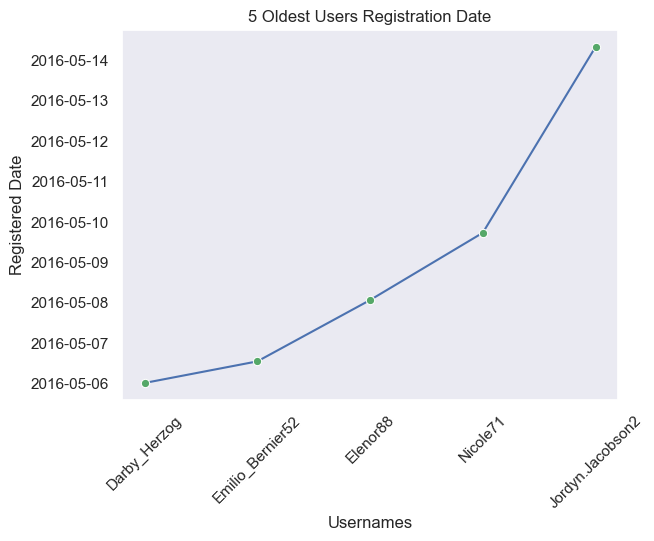

In [28]:
df_q1 = send_query(task1)

ax0 = sns.lineplot(x='username', y='created_at', data=df_q1, marker='o', markerfacecolor='g')
ax0.set(title='5 Oldest Users Registration Date', ylabel='Registered Date', xlabel='Usernames')
plt.xticks(rotation=45)
plt.show()

<h4>Task 2:</h4>

 - What day of the week do most users register on? <br>
 - We need to figure out when to schedule an ad campgain

In [29]:
task2 = """
SELECT DATENAME(WEEKDAY, created_at) as day_of_week, COUNT(id) as registered_users
FROM Hi_Counselor.dbo.users
GROUP BY DATENAME(WEEKDAY, created_at)
ORDER BY 2 DESC
"""

In [30]:
send_query(task2)

,day_of_week,registered_users
0,Sunday,16
1,Thursday,16
2,Friday,15
3,Monday,14
4,Tuesday,14
5,Wednesday,13
6,Saturday,12


[Text(0.5, 1.0, 'User Registration by Day of the Week')]

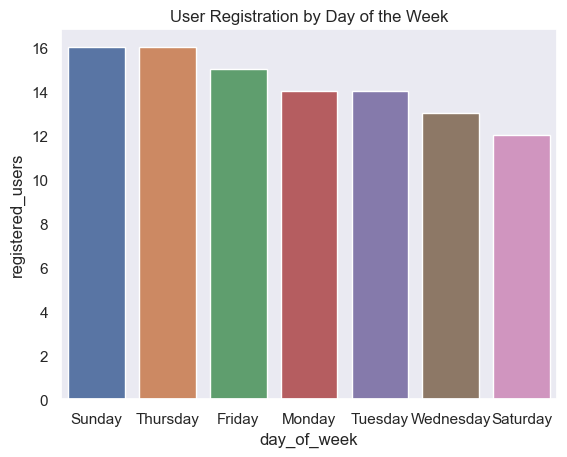

In [31]:
df_q2 =send_query(task2)

ax1 = sns.barplot(x='day_of_week', y='registered_users', data=df_q2)
ax1.set(title='User Registration by Day of the Week')

<h4>Task 3:</h4>

 - We want to target our inactive users with an email campaign. <br>Find the users who have never posted a photo.

In [32]:
task3 = """
SELECT users.id, users.username, COUNT(DISTINCT photos.user_id) AS number_of_photos
FROM Hi_Counselor.dbo.photos
FULL OUTER JOIN Hi_Counselor.dbo.users
ON photos.user_id = users.id
GROUP BY users.id, users.username
HAVING COUNT( photos.user_id) = 0
ORDER BY users.id
"""

In [33]:
send_query(task3)

,id,username,number_of_photos
0,5,Aniya_Hackett,0
1,7,Kasandra_Homenick,0
2,14,Jaclyn81,0
3,21,Rocio33,0
4,24,Maxwell.Halvorson,0
5,25,Tierra.Trantow,0
6,34,Pearl7,0
7,36,Ollie_Ledner37,0
8,41,Mckenna17,0
9,45,David.Osinski47,0


<h4>Task 4:</h4>

 - We're running a new contest to see who can get the most likes on a single photo. WHO WON?

In [34]:
task4 = """
SELECT TOP 1 likes.photo_id, count(likes.user_id) AS number_of_likes, photos.user_id, users.username
FROM Hi_Counselor.dbo.likes
JOIN Hi_Counselor.dbo.photos ON Hi_Counselor.dbo.likes.photo_id=Hi_Counselor.dbo.photos.id
JOIN Hi_Counselor.dbo.users ON Hi_Counselor.dbo.photos.user_id=Hi_Counselor.dbo.users.id
GROUP BY likes.photo_id, photos.user_id, users.username
ORDER BY 2 DESC
"""

In [35]:
send_query(task4)

,photo_id,number_of_likes,user_id,username
0,145,48,52,Zack_Kemmer93


<h4>Task 5:</h4>

 - Our Investors want to know...How many times does the average user post? (total number of photos/total number of users)

In [36]:
task5 = """
SELECT DISTINCT(COUNT(photos.id)) as total_photos , 
COUNT(DISTINCT(users.id)) as total_users, 
ROUND(CAST(COUNT(DISTINCT photos.id) as DECIMAL(5,2))/CAST(COUNT(DISTINCT users.id) as DECIMAL(5,2)),2) as average_photos_per_user
FROM Hi_Counselor.dbo.photos
FULL OUTER JOIN Hi_Counselor.dbo.users ON Hi_Counselor.dbo.users.id=Hi_Counselor.dbo.photos.user_id
"""

In [37]:
send_query(task5)

,total_photos,total_users,average_photos_per_user
0,257,100,2.57


<h4>Task 6:</h4>

 - user ranking by postings higher to lower

In [38]:
task6 = """
SELECT users.username, COUNT(photos.id) as total_posts
FROM Hi_Counselor.dbo.photos
JOIN Hi_Counselor.dbo.users ON Hi_Counselor.dbo.users.id=Hi_Counselor.dbo.photos.user_id
GROUP BY  users.username
ORDER BY 2 DESC
"""

In [39]:
send_query(task6)

,username,total_posts
0,Eveline95,12
1,Clint27,11
2,Cesar93,10
3,Delfina_VonRueden68,9
4,Aurelie71,8
5,Jaime53,8
6,Donald.Fritsch,6
7,Florence99,5
8,Harrison.Beatty50,5
9,Colten.Harris76,5


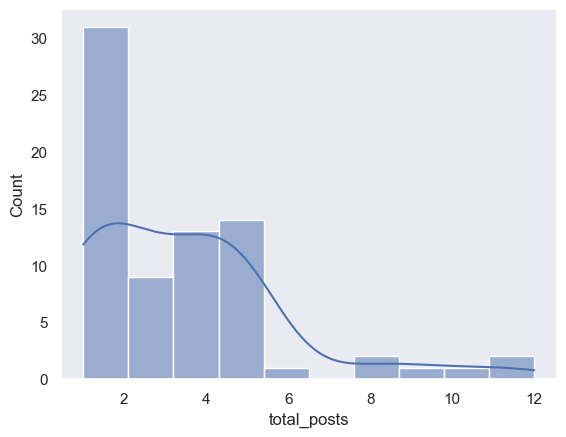

In [40]:
df_q3 = send_query(task6)

ax2 = sns.histplot(data=df_q3, x='total_posts', kde=True, bins=10)

In [41]:
results = send_query(task6)
results[['total_posts']].sum()

total_posts    257
dtype: int64

<h4>Task 7:</h4>

 - Total numbers of users who have posted at least one time

In [42]:
# Taks 8: 

task7 = """
WITH CTE AS(
SELECT COUNT(users.username) as users_count, COUNT(photos.id) as total_posts
FROM Hi_Counselor.dbo.photos
JOIN Hi_Counselor.dbo.users ON Hi_Counselor.dbo.users.id=Hi_Counselor.dbo.photos.user_id
GROUP BY  users.username
)

SELECT COUNT(users_count) Total_ursers_posted
FROM CTE
"""


In [43]:
send_query(task7)

,Total_ursers_posted
0,74


<h4>Task 8:</h4>

 - A brand wants to know which hashtags to use in a post. What are the top 5 most commonly used hashtags?

In [44]:
task8 = """
SELECT TOP 5 tags.tag_name, photo_tags.tag_id, COUNT(photo_tags.tag_id) AS number_of_times_tag_is_used
From Hi_Counselor.dbo.photo_tags
JOIN Hi_Counselor.dbo.tags ON Hi_Counselor.dbo.photo_tags.tag_id = Hi_Counselor.dbo.tags.id
GROUP BY photo_tags.tag_id, tags.tag_name
ORDER BY 3 DESC
"""

In [45]:
send_query(task8)

,tag_name,tag_id,number_of_times_tag_is_used
0,smile,21,59
1,beach,20,42
2,party,17,39
3,fun,13,38
4,concert,18,24


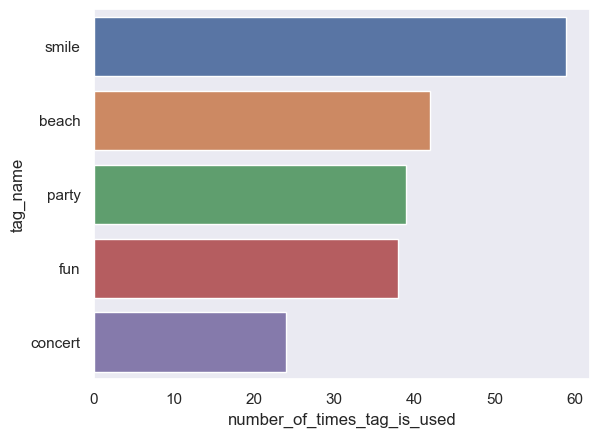

In [46]:
df_q4 = send_query(task8)
ax3 = sns.barplot(data=df_q4, x='number_of_times_tag_is_used', y='tag_name')

<h4>Task 9:</h4>

 - Find users who have liked every single photo on the site

In [47]:
task9 = """
SELECT users.username, COUNT(likes.photo_id) AS number_of_likes
FROM Hi_Counselor.dbo.likes
JOIN Hi_Counselor.dbo.users ON users.id = likes.user_id
GROUP BY users.username
HAVING COUNT(likes.photo_id) = 257
ORDER BY 1
"""

In [48]:
send_query(task9)

,username,number_of_likes
0,Aniya_Hackett,257
1,Bethany20,257
2,Duane60,257
3,Jaclyn81,257
4,Janelle.Nikolaus81,257
5,Julien_Schmidt,257
6,Leslie67,257
7,Maxwell.Halvorson,257
8,Mckenna17,257
9,Mike.Auer39,257


<h4>Task 10:</h4>

 -  Find users who have never commented on a photo

In [49]:
task10 = """
SELECT users.username, COUNT(comments.user_id) AS number_of_comments
FROM Hi_Counselor.dbo.comments
FULL OUTER JOIN Hi_Counselor.dbo.users ON users.id = comments.user_id
GROUP BY users.username
HAVING COUNT(comments.user_id) = 0
ORDER BY 1
"""

In [50]:
send_query(task10)

,username,number_of_comments
0,Aurelie71,0
1,Bartholome.Bernhard,0
2,Cesar93,0
3,Clint27,0
4,Darby_Herzog,0
5,David.Osinski47,0
6,Delfina_VonRueden68,0
7,Donald.Fritsch,0
8,Esmeralda.Mraz57,0
9,Esther.Zulauf61,0


<h4>Task 11:</h4>

 -  Find total users who have either never commented on a photo or have commented on every photo.
 -  Find the percentage of our users who have either never commented on a photo or have commented on every photo.

In [51]:
task11_a = """
SELECT users.username, COUNT(comments.user_id) AS number_of_comments
FROM Hi_Counselor.dbo.comments
FULL OUTER JOIN Hi_Counselor.dbo.users ON users.id = comments.user_id
GROUP BY users.username
HAVING COUNT(comments.user_id) = 0 OR COUNT(comments.user_id) = 257
ORDER BY 2,1
"""

In [52]:
send_query(task11_a)

,username,number_of_comments
0,Aurelie71,0
1,Bartholome.Bernhard,0
2,Cesar93,0
3,Clint27,0
4,Darby_Herzog,0
5,David.Osinski47,0
6,Delfina_VonRueden68,0
7,Donald.Fritsch,0
8,Esmeralda.Mraz57,0
9,Esther.Zulauf61,0


In [53]:
task11_b = """
WITH CTE AS(
SELECT users.id, users.username, COUNT(comments.user_id) AS number_of_comments,
CASE 
    WHEN COUNT(comments.user_id) = 0 or COUNT(comments.user_id) = 257 THEN 1
    WHEN COUNT(comments.user_id) != 0 AND COUNT(comments.user_id) != 257 THEN  0
END AS condition
FROM Hi_Counselor.dbo.comments
FULL OUTER JOIN Hi_Counselor.dbo.users ON Hi_Counselor.dbo.users.id = comments.user_id
GROUP BY users.username, users.id)

SELECT COUNT(username) as total_users, SUM(condition) as bots_celebs_accounts, SUM(CAST(condition AS DECIMAL))/CAST(COUNT(username) AS DECIMAL)*100 AS bots_celebs_accounts_pct
FROM CTE;
"""

In [54]:
send_query(task11_b)

,total_users,bots_celebs_accounts,bots_celebs_accounts_pct
0,100,36,36.0


<h4>Task 12:</h4>

 -  Find users who have ever commented on a photo.
 -  Find the total of users who have ever commented on a photo

In [55]:
task12_a = """

SELECT users.id, users.username, COUNT(comments.user_id) AS number_of_comments
FROM Hi_Counselor.dbo.comments
FULL OUTER JOIN Hi_Counselor.dbo.users ON Hi_Counselor.dbo.users.id = comments.user_id
GROUP BY users.username, users.id
HAVING COUNT(comments.user_id) != 0
ORDER BY 3
"""

In [56]:
send_query(task12_a)

,id,username,number_of_comments
0,11,Justina.Gaylord27,49
1,16,Annalise.McKenzie16,52
2,18,Odessa2,53
3,42,Maya.Farrell,54
4,48,Granville_Kutch,55
5,52,Zack_Kemmer93,56
6,32,Irwin.Larson,56
7,85,Milford_Gleichner42,57
8,38,Jordyn.Jacobson2,58
9,13,Alexandro35,58


[Text(0.5, 1.0, 'Histogram of Number of Comments by User'),
 Text(0, 0.5, 'Number of comments'),
 Text(0.5, 0, 'Comment Number Buckets')]

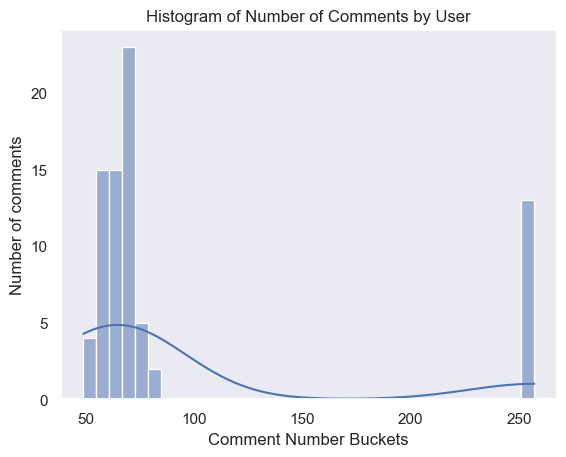

In [57]:


ax5 = sns.histplot(data=send_query(task12_a), x='number_of_comments', kde=True)
ax5.set(title='Histogram of Number of Comments by User',
        ylabel='Number of comments', xlabel='Comment Number Buckets')

In [58]:
task12_b = """

Select COUNT(username) as total_users_with_comments
FROM (
SELECT users.id, users.username, COUNT(comments.user_id) AS number_of_comments
FROM Hi_Counselor.dbo.comments
FULL OUTER JOIN Hi_Counselor.dbo.users ON Hi_Counselor.dbo.users.id = comments.user_id
GROUP BY users.username, users.id
HAVING COUNT(comments.user_id) != 0) 
subquery
"""

In [59]:
send_query(task12_b)

,total_users_with_comments
0,77
